# DIABETES PATIENT'S HOSPITAL READMISSION


## Problem Statement 
Hospital readmissions are becoming a more expensive and noticeable problem for the general public and hospitals in terms of both money and patient care. A hospital readmission occurs when a patient who has been discharged from hospital is later readmitted within a predetermined time frame. The Hospital Readmissions Reduction Program (HRRP) is a Medicare value-based buying initiative that pushes hospitals to enhance care coordination and communication to better involve patients and caregivers in discharge plans and, as a result, lower avoidable readmission rates. By tying hospital service quality to funding, the initiative promotes the national objective of bettering Americans' access to healthcare.
Diabetes is a major contributing factor to kidney disease, heart attacks, strokes, lower limb amputation and blindness. As a result, many patients with diabetes are hospitalized to hospitals and given medication. According to the Agency for Healthcare Research and Quality (AHRQ), hospitals spent 41.3 billion dollars between January and November 2011 treating patients who were readmitted within 30 days of being discharged. In which, diabetes led to 23,700 readmissions and cost $251 million. As this is a huge burden on both hospitals, governments, patients and insurance companies, we try solving this problem by answering the below questions:
- How well can we predict hospital readmission? This helps hospital aims to improve quality of care for patients and lower healthcare spending. Early prediction can also help to lessen the severity of the situation and lessen the economical strain on the families. We want to employ a number of classification models, choosing the most suitable one for our forecast based on the Recall Score(Explanation for considering Recall is explained in section 6.1)

### Authored by:

Sarath Chandra Adusumilli 

## Description of the analysis and dataset

In this project, we will be using a dataset containing information from [UCI](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

The dataset represents clinical treatment provided over a ten-year period (1999–2008) at 130 US hospitals and integrated delivery networks. More than 50 features that represent patient and hospital outcomes are available. In our project we will specifically look for data that satisfies give us insights on hospital readmissions for diabetes. This information includes features like patient number, race, gender, and age; admission type, length of stay in the hospital; admitting physician's medical specialty; the number of lab tests conducted; the HbA1c test result; the diagnosis; the number of medications; the number of diabetic medications; and the number of outpatient, inpatient, and emergency visits in the year prior to the hospitalization.

The data is submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).


### Input Variables:

- Encounter ID: Unique identifier of an encounter
- Patient number: Unique identifier of a patient
- Race Values: Caucasian, Asian, African American, Hispanic, and other
- Gender Values: male, female, and unknown/invalid
- Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
- Weight: Weight in pounds
- Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
- Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- Time in hospital: Integer number of days between admission and discharge
- Payer code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
- Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
- Number of lab procedures: Number of lab tests performed during the encounter
- Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter
- Number of medications: Number of distinct generic names administered during the encounter
- Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter
- Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter
- Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter
- Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- Number of diagnoses: Number of diagnoses entered to the system 0%
- Glucose serum: test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
- Change of medications: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
- Diabetes medications: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
- 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

### Target Variable:
- Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission


## Step 1: Install and import necessary packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import binarize
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold


from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from sklearn import metrics
from xgboost import XGBClassifier
import pandas_profiling

%matplotlib inline

seed = 42

import warnings
warnings.filterwarnings('ignore')



## Step 2: Preliminary Problem Scoping

Our goal is to develop a model to identify if if the patient readmits in less than 30 days or not. It is not yet known if the classes are imbalanced. We will try to use an oversampling technique to rebalance these classes if they are imbalanced. we will explore different model and we will also explore the optimal parameters through hyperparameter tuning and producing ROC-AUC curves.

## Step 3: Load, clean and prepare data for analysis

### 3.1 Load data from source

In [ ]:
# Import dataset
readmit_df = pd.read_csv("diabetic_data.csv")

# Preview the dataset
readmit_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 3.2 Explore the data

In [ ]:
# View Column Names
readmit_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
readmit_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
readmit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### 3.3 Check for missing values

In [ ]:
## Check for missing values
#In the dataset missing values are represented as '?' sign
for col in readmit_df.columns:
    if readmit_df[col].dtype == object:
         print(col,readmit_df[col][readmit_df[col] == '?'].count())


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


## Step 4: Clean and transform data

### 4.1 Separate Categorical and Continuous variables

In [ ]:
# Separate Categorical and Continuous variables
categorical_col, contin_val=[],[]

for i in readmit_df.columns:
    
    if readmit_df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


### 4.2 Target variable: 
Whether or not the patient is readmitted to the hospital within 30 days is the result we are focusing on. The variable actually has three categories:  < 30, > 30, and No Readmission. We consolidated the readmission after 30 days and no readmission into a single category in order to simplify our issue to a binary categorization.

In [ ]:
readmit_df['readmitted'] = readmit_df['readmitted'].replace('>30', 0)
readmit_df['readmitted'] = readmit_df['readmitted'].replace('<30', 1)
readmit_df['readmitted'] = readmit_df['readmitted'].replace('NO', 0)
print(readmit_df.readmitted)


0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64


### 4.3 Gender Variable:

In [ ]:
# gender shows different data so we used custom count            
print('gender', readmit_df['gender'][readmit_df['gender'] == 'Unknown/Invalid'].count()) 

gender 3


### 4.4 Dropping Variable weight, Payer code, medical speciality and encounter_id

Our findings from the data exploration indicate that there are  missing values.
We opted to eliminate Variable weight, Payer code, and medical speciality because the majority of the data for these variables is missing, and there is little point in filling in those empty values.


In [ ]:
#dropping columns with large number of missing values
readmit_df = readmit_df.drop(['weight','payer_code','medical_specialty'], axis = 1)


#dropping columns encounter_id as they are just unique identifiers and not going to effect model
readmit_df = readmit_df.drop(['encounter_id'], axis = 1)
readmit_df



,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,0


### 4.5 Dropping variables examide and citoglipton

All entries have the same value for the variables examide and citoglipton. As a result, they essentially cannot offer any interpreting or discriminating information for predicting readmission, hence we eliminated these two variables.

In [ ]:
# Dropping variables examide and citoglipton
readmit_df = readmit_df.drop(['citoglipton', 'examide'], axis = 1)
readmit_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,0


### 4.6 Handling missing values in Race, diag 1, diag 2, diag 3, and gender variables

Race, diag 1, diag 2, diag 3, and gender variables all have far less missing values than the other attributes we omitted, therefore we opted to remove those rows.

In [ ]:
cleandata = set(readmit_df[(readmit_df['diag_1'] == '?') & (readmit_df['diag_2'] == '?') & (readmit_df['diag_3'] == '?')].index)

cleandata = cleandata.union(set(readmit_df['diag_1'][readmit_df['diag_1'] == '?'].index))
cleandata = cleandata.union(set(readmit_df['diag_2'][readmit_df['diag_2'] == '?'].index))
cleandata = cleandata.union(set(readmit_df['diag_3'][readmit_df['diag_3'] == '?'].index))
cleandata = cleandata.union(set(readmit_df['race'][readmit_df['race'] == '?'].index))
cleandata = cleandata.union(set(readmit_df[readmit_df['discharge_disposition_id'] == 11].index))
cleandata = cleandata.union(set(readmit_df['gender'][readmit_df['gender'] == 'Unknown/Invalid'].index))
new_cleandata = list(set(readmit_df.index) - set(cleandata))
readmit_df = readmit_df.iloc[new_cleandata]

In [ ]:
#Checking for missing values in the data
for col in readmit_df.columns:
    if readmit_df[col].dtype == object:
         print(col,readmit_df[col][readmit_df[col] == '?'].count())
            
print('gender', readmit_df['gender'][readmit_df['gender'] == 'Unknown/Invalid'].count())   

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
gender 0


### 4.7 Handling data related to 23 medications

A change in the drug taken during the patient's current hospital stay is indicated for each of the 23 medications in the dataset, which totals 23 medications. Previous research has shown that altering a diabetic patient's medication regimen after admission is associated with a lower readmission rate. We decided that adding up the total number of adjustments performed for each patient would be a new feature. The aim was to simplify the model and investigate the possibilities of finding a correlation between the number of changes and the modified drug.

In [ ]:
drugs23 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in drugs23:
    colname = str(col) + 'temp'
    readmit_df[colname] = readmit_df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
readmit_df['numchange'] = 0
for col in drugs23:
    colname = str(col) + 'temp'
    readmit_df['numchange'] = readmit_df['numchange'] + readmit_df[colname]
    del readmit_df[colname]
    
readmit_df['numchange'].value_counts()  

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

### 4.8 Converting admission type, discharge type and admission source are re-encoding into fewer categories based on the mapping details provided in mapping data set and data description

From the mapping dataset that is given, we can derive below:


In [ ]:
# admission type, discharge type and admission source are re-encoding into fewer categories

readmit_df['admission_type_id'] = readmit_df['admission_type_id'].replace(2,1)
readmit_df['admission_type_id'] = readmit_df['admission_type_id'].replace(7,1)
readmit_df['admission_type_id'] = readmit_df['admission_type_id'].replace(6,5)
readmit_df['admission_type_id'] = readmit_df['admission_type_id'].replace(8,5)

readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(6,1)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(8,1)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(9,1)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(13,1)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(3,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(4,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(5,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(14,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(22,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(23,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(24,2)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(12,10)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(15,10)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(16,10)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(17,10)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(25,18)
readmit_df['discharge_disposition_id'] = readmit_df['discharge_disposition_id'].replace(26,18)

readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(2,1)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(3,1)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(5,4)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(6,4)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(10,4)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(22,4)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(25,4)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(15,9)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(17,9)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(20,9)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(21,9)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(13,11)
readmit_df['admission_source_id'] = readmit_df['admission_source_id'].replace(14,11)

### 4.9 Encoding few variables

The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better reflect their nature and fit them into our model, we interpret the variables as binary variables.

In [ ]:
readmit_df['change'] = readmit_df['change'].replace('Ch', 1)
readmit_df['change'] = readmit_df['change'].replace('No', 0)
readmit_df['gender'] = readmit_df['gender'].replace('Male', 1)
readmit_df['gender'] = readmit_df['gender'].replace('Female', 0)
readmit_df['diabetesMed'] = readmit_df['diabetesMed'].replace('Yes', 1)
readmit_df['diabetesMed'] = readmit_df['diabetesMed'].replace('No', 0)
for col in drugs23:
    readmit_df[col] = readmit_df[col].replace('No', 0)
    readmit_df[col] = readmit_df[col].replace('Steady', 1)
    readmit_df[col] = readmit_df[col].replace('Up', 1)
    readmit_df[col] = readmit_df[col].replace('Down', 1)

### 4.10 Encoding Age vairable

We don't know the precise age of each patient because the dataset only provides age in 10-year increments. Age categories were utilized as nominal variables in the last study on this dataset, but we wanted to be able to understand how being older affected readmission. To achieve that, we assume that the patient's age generally falls in the middle of the age range. For instance, if the patient falls into the 40–50 year age range, we will infer that the patient is 45 years old. Therefore, we transformed age ranges to midpoints, producing a numerical variable

In [ ]:
# code for age intervals 
for i in range(0,10):
    readmit_df['age'] = readmit_df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
readmit_df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

### 4.11 Encoding A1CResult and max_glu_serum

Also as per the data description,  we divided the results of the A1C test and the glucose serum test into three categories: Normal, Abnormal, and Not tested.

In [ ]:
readmit_df['A1Cresult'] = readmit_df['A1Cresult'].replace('>7', 1)
readmit_df['A1Cresult'] = readmit_df['A1Cresult'].replace('>8', 1)
readmit_df['A1Cresult'] = readmit_df['A1Cresult'].replace('Norm', 0)
readmit_df['A1Cresult'] = readmit_df['A1Cresult'].replace('None', -99)
readmit_df['max_glu_serum'] = readmit_df['max_glu_serum'].replace('>200', 1)
readmit_df['max_glu_serum'] = readmit_df['max_glu_serum'].replace('>300', 1)
readmit_df['max_glu_serum'] = readmit_df['max_glu_serum'].replace('Norm', 0)
readmit_df['max_glu_serum'] = readmit_df['max_glu_serum'].replace('None', -99)

### 4.12 Handling Multiple encounters

Multiple encounters were had by several patients. We were unable to consider them as separate events because doing so would advantage patients who had numerous encounters. In order to aggregate and consolidate several encounters for the same patient.

In [ ]:
readmit_df2 = readmit_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
readmit_df2.shape

(67580, 45)

### 4.13 Handling diag_1, diag_2 and diag_3 using icd9 codes

From the previous work done which I mentioned in references the following abbreviations are used for particular icd9 codes: “circulatory” for icd9: 390–459, 785, “digestive” for icd9: 520–579, 787, “genitourinary” for icd9: 580–629, 788, “diabetes” for icd9: 250.xx, “injury” for icd9: 800–999, “musculoskeletal” for icd9: 710–739, “neoplasms” for icd9: 140–239, “respiratory’’ for icd9: 460–519, 786, and “other” for otherwise.

In [ ]:
readmit_df['level1_diag1'] = readmit_df['diag_1']
readmit_df['level2_diag1'] = readmit_df['diag_1']
readmit_df['level1_diag2'] = readmit_df['diag_2']
readmit_df['level2_diag2'] = readmit_df['diag_2']
readmit_df['level1_diag3'] = readmit_df['diag_3']
readmit_df['level2_diag3'] = readmit_df['diag_3']
readmit_df.loc[readmit_df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
readmit_df.loc[readmit_df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
readmit_df.loc[readmit_df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
readmit_df.loc[readmit_df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
readmit_df.loc[readmit_df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
readmit_df.loc[readmit_df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
readmit_df['level1_diag1'] = readmit_df['level1_diag1'].replace('?', -1)
readmit_df['level2_diag1'] = readmit_df['level2_diag1'].replace('?', -1)
readmit_df['level1_diag2'] = readmit_df['level1_diag2'].replace('?', -1)
readmit_df['level2_diag2'] = readmit_df['level2_diag2'].replace('?', -1)
readmit_df['level1_diag3'] = readmit_df['level1_diag3'].replace('?', -1)
readmit_df['level2_diag3'] = readmit_df['level2_diag3'].replace('?', -1)

In [ ]:
readmit_df['level1_diag1'] = readmit_df['level1_diag1'].astype(float)
readmit_df['level2_diag1'] = readmit_df['level2_diag1'].astype(float)
readmit_df['level1_diag2'] = readmit_df['level1_diag2'].astype(float)
readmit_df['level2_diag2'] = readmit_df['level2_diag2'].astype(float)
readmit_df['level1_diag3'] = readmit_df['level1_diag3'].astype(float)
readmit_df['level2_diag3'] = readmit_df['level2_diag3'].astype(float)

In [ ]:
for index, row in readmit_df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        readmit_df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        readmit_df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        readmit_df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        readmit_df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        readmit_df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        readmit_df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        readmit_df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        readmit_df.loc[index, 'level1_diag1'] = 8
    else:
        readmit_df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        readmit_df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        readmit_df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        readmit_df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        readmit_df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        readmit_df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        readmit_df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        readmit_df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        readmit_df.loc[index, 'level1_diag2'] = 8
    else:
        readmit_df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        readmit_df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        readmit_df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        readmit_df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        readmit_df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        readmit_df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        readmit_df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        readmit_df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        readmit_df.loc[index, 'level1_diag3'] = 8
    else:
        readmit_df.loc[index, 'level1_diag3'] = 0

In [ ]:
for index, row in readmit_df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        readmit_df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        readmit_df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        readmit_df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        readmit_df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        readmit_df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        readmit_df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        readmit_df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        readmit_df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        readmit_df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        readmit_df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        readmit_df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        readmit_df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        readmit_df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        readmit_df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        readmit_df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        readmit_df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        readmit_df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        readmit_df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        readmit_df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        readmit_df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        readmit_df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        readmit_df.loc[index, 'level2_diag1'] = 22
    else:
        readmit_df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        readmit_df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        readmit_df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        readmit_df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        readmit_df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        readmit_df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        readmit_df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        readmit_df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        readmit_df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        readmit_df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        readmit_df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        readmit_df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        readmit_df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        readmit_df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        readmit_df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        readmit_df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        readmit_df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        readmit_df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        readmit_df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        readmit_df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        readmit_df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        readmit_df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        readmit_df.loc[index, 'level2_diag2'] = 22
    else:
        readmit_df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        readmit_df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        readmit_df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        readmit_df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        readmit_df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        readmit_df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        readmit_df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        readmit_df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        readmit_df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        readmit_df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        readmit_df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        readmit_df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        readmit_df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        readmit_df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        readmit_df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        readmit_df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        readmit_df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        readmit_df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        readmit_df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        readmit_df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        readmit_df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        readmit_df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        readmit_df.loc[index, 'level2_diag3'] = 22
    else:
        readmit_df.loc[index, 'level2_diag3'] = 0

We do not want to lose that information by interpreting the age category as a simple categorical variable because it is ordinal rather than just nominal.

In [ ]:
readmit_df['age'] = readmit_df['age'].astype('int64')
print(readmit_df.age.value_counts())
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
readmit_df['age'] = readmit_df.age.map(age_dict)
print(readmit_df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


### 4.14 Converting Nominal features to Object type

In [ ]:
# convert data type of nominal features in dataframe to 'object' type
index = [ 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'age',  'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

readmit_df[index] = readmit_df[index].astype('object')

### 4.15 Checking patient's overall drug regimen

The patient's overall drug regimen is yet another potential issue. By keeping track of the prescriptions taken throughout the contact, we observed it further.

In [ ]:
readmit_df['cnt_med'] = 0

for col in drugs23:
    readmit_df['cnt_med'] = readmit_df['cnt_med'] + readmit_df[col]
readmit_df['cnt_med'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: cnt_med, dtype: int64

### 4.16 Dropping variables related to individual diagnosis and other levels 

In [ ]:
# Remove specific diagnosis columns that contain unnecessary information about the condition.
# Drop level 2 classification, Drop level 1 secondary and tertiary diagnoses.
readmit_df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [ ]:
readmit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96446 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               96446 non-null  int64 
 1   race                      96446 non-null  object
 2   gender                    96446 non-null  object
 3   age                       96446 non-null  object
 4   admission_type_id         96446 non-null  object
 5   discharge_disposition_id  96446 non-null  object
 6   admission_source_id       96446 non-null  object
 7   time_in_hospital          96446 non-null  int64 
 8   num_lab_procedures        96446 non-null  int64 
 9   num_procedures            96446 non-null  int64 
 10  num_medications           96446 non-null  int64 
 11  number_outpatient         96446 non-null  int64 
 12  number_emergency          96446 non-null  int64 
 13  number_inpatient          96446 non-null  int64 
 14  number_diagnoses     

### 4.17 Encoding Categorical Variables

In [ ]:
# Encoding Categorical Variables
le = preprocessing.LabelEncoder()
readmit_df['race'] = le.fit_transform(readmit_df['race'])
readmit_df['gender'] = le.fit_transform(readmit_df['gender'])
readmit_df['age'] = le.fit_transform(readmit_df['age'])
readmit_df['admission_source_id'] = le.fit_transform(readmit_df['admission_source_id'])
readmit_df['discharge_disposition_id'] = le.fit_transform(readmit_df['discharge_disposition_id'])
readmit_df['level1_diag1'] = le.fit_transform(readmit_df['level1_diag1'])
readmit_df['max_glu_serum'] = le.fit_transform(readmit_df['max_glu_serum'])

readmit_df




,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,level1_diag1,cnt_med
1,55629189,2,0,1,1,0,2,3,59,0,...,0,0,0,0,1,1,0,1,0,1
2,86047875,0,0,2,1,0,2,2,11,5,...,0,0,0,0,0,1,0,0,0,1
3,82442376,2,1,3,1,0,2,2,44,1,...,0,0,0,0,1,1,0,1,0,1
4,42519267,2,1,4,1,0,2,1,51,0,...,0,0,0,0,1,1,0,0,8,2
5,82637451,2,1,5,1,0,0,3,31,6,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,0,1,7,1,1,2,3,51,0,...,0,0,0,0,1,1,0,1,4,2
101762,74694222,0,0,8,1,1,1,5,33,3,...,0,0,0,0,0,1,0,0,3,1
101763,41088789,2,1,7,1,0,2,1,53,0,...,0,0,0,0,1,1,0,1,0,2
101764,31693671,2,0,8,1,1,2,10,45,2,...,0,0,0,0,1,1,0,1,5,3


In [ ]:
# Encoding Categorical Variables
le = preprocessing.LabelEncoder()
readmit_df['admission_type_id'] = le.fit_transform(readmit_df['admission_type_id'])


readmit_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,level1_diag1,cnt_med
1,55629189,2,0,1,0,0,2,3,59,0,...,0,0,0,0,1,1,0,1,0,1
2,86047875,0,0,2,0,0,2,2,11,5,...,0,0,0,0,0,1,0,0,0,1
3,82442376,2,1,3,0,0,2,2,44,1,...,0,0,0,0,1,1,0,1,0,1
4,42519267,2,1,4,0,0,2,1,51,0,...,0,0,0,0,1,1,0,0,8,2
5,82637451,2,1,5,0,0,0,3,31,6,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,0,1,7,0,1,2,3,51,0,...,0,0,0,0,1,1,0,1,4,2
101762,74694222,0,0,8,0,1,1,5,33,3,...,0,0,0,0,0,1,0,0,3,1
101763,41088789,2,1,7,0,0,2,1,53,0,...,0,0,0,0,1,1,0,1,0,2
101764,31693671,2,0,8,0,1,2,10,45,2,...,0,0,0,0,1,1,0,1,5,3


### 4.18 Checking highly correlated columns

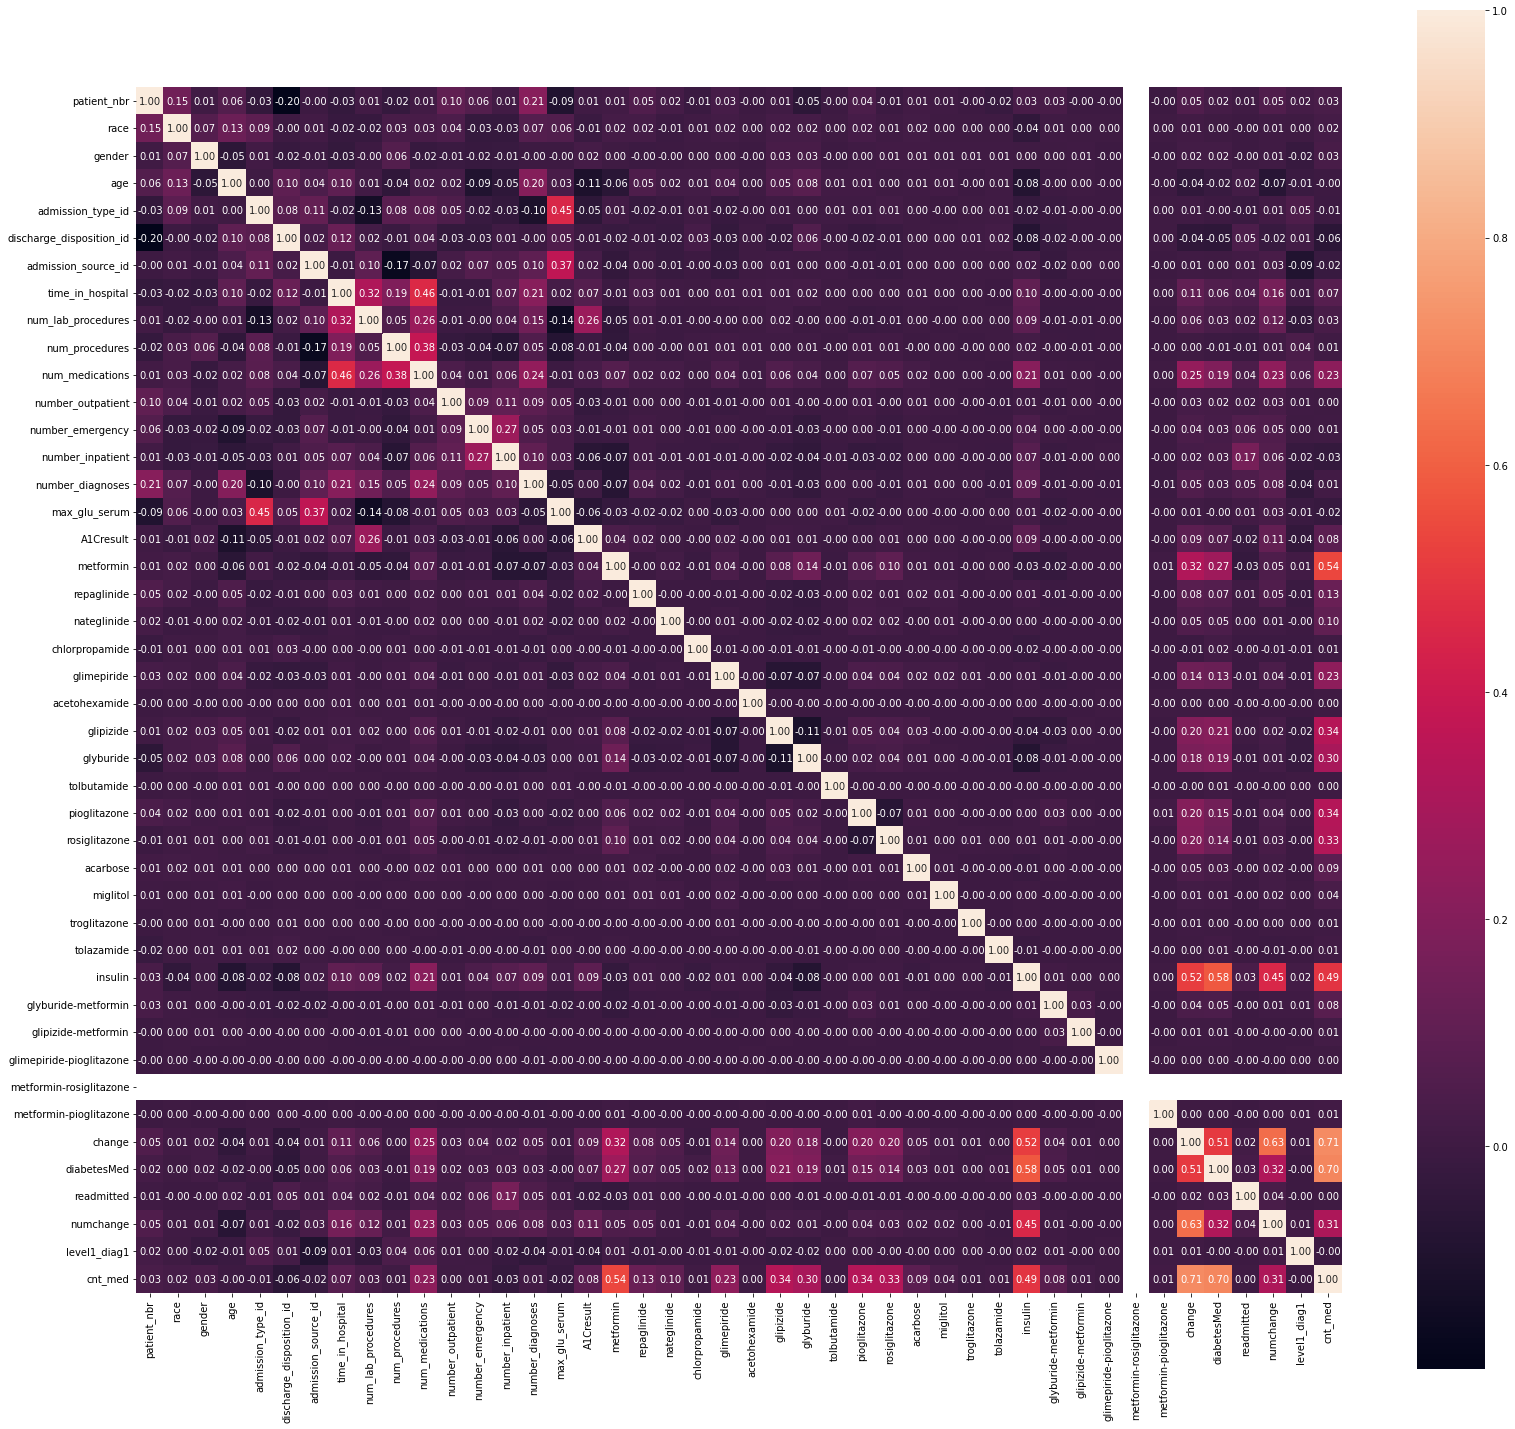

In [ ]:
# Lets findout which columns are highly correlated.

plt.figure(figsize=(27,25))
ax = sns.heatmap(readmit_df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

Based on the above heat map, we dont see any highly correlated variables so we couldnt remove any variables

In [ ]:
readmit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96446 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   patient_nbr               96446 non-null  int64
 1   race                      96446 non-null  int64
 2   gender                    96446 non-null  int64
 3   age                       96446 non-null  int64
 4   admission_type_id         96446 non-null  int64
 5   discharge_disposition_id  96446 non-null  int64
 6   admission_source_id       96446 non-null  int64
 7   time_in_hospital          96446 non-null  int64
 8   num_lab_procedures        96446 non-null  int64
 9   num_procedures            96446 non-null  int64
 10  num_medications           96446 non-null  int64
 11  number_outpatient         96446 non-null  int64
 12  number_emergency          96446 non-null  int64
 13  number_inpatient          96446 non-null  int64
 14  number_diagnoses          96446 non-n

### 4.19 Checking Data Imbalance

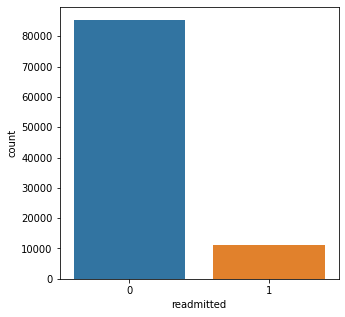

In [ ]:
# Checking Data Imbalance in Target Variable
plt.figure(figsize=(5,5))
sns.countplot(data=readmit_df,x='readmitted')

From the above figure we can conclude that data is highly imbalanced and we need to handle it.

## Step 5: Partition data into training and test sets

In [ ]:
# Splitting Train Data & Test Data

train_df, validation_df = train_test_split(readmit_df, test_size=0.3, random_state=1)

## Step 6: Address any data imbalances and scaling

We will utilize an oversampling technique to address data balancing.

In [ ]:
#Checking Counts of Train Data & Test Data
no_count, yes_count = train_df.readmitted.value_counts()
print(no_count, yes_count)

59764 7748


In [ ]:
#Handling Data Imbalance using Over Sampling
readmitted_target_df  = train_df.loc[train_df.readmitted==1]
df_oversampled = readmitted_target_df.sample(n=(no_count-yes_count),replace=True)

train_df = pd.concat([train_df, df_oversampled], ignore_index=True)
train_df.readmitted.value_counts()

0    59764
1    59764
Name: readmitted, dtype: int64

Scaling





In [ ]:
#Scaling 
target = 'readmitted'
predictors = list(readmit_df.columns)
predictors.remove(target)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(readmit_df[predictors])

# Transform the predictors of training and validation sets
train_predictors = scaler.transform(train_df[predictors]) # train_predictors is not a numpy array
train_target = train_df[target] # train_target is now a series object

validation_predictors = scaler.transform(validation_df[predictors]) # validation_target is now a series object
validation_target = validation_df[target] # validation_target is now a series object

## 6.1 Best Metric
In our case, below are our equations for False Negatives and False Positives. 
FN: Patient Readmitted but model predicted as not readmitted (More Damage)
FP: Patient didn’t readmit but predicted as readmitted (Less damage)
Here after thorough brainstorming, we could see that FN has more weightage, we will consider Recall as our metric and will evaluate models based on that.


## Step 7: Train our models

## 7.1 Logistic regression model

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression( random_state=0)

# fit the model
logreg.fit(train_predictors, train_target)

LogisticRegression(random_state=0)

### 7.1.1 Measure performance of model on validation data

In [ ]:
y_pred_test = logreg.predict(validation_predictors)

y_pred_test

array([1, 1, 0, ..., 0, 1, 0])

### 7.1.2 Using predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1). 
0 is for probability of no readmission and 1 is for probability of readmission.

In [ ]:
# probability of getting output as 0 (no readmission)

logreg.predict_proba(validation_predictors)[:,0]

array([0.37785432, 0.26827575, 0.65012832, ..., 0.5417669 , 0.39892133,
       0.57176442])

In [ ]:
# probability of getting output as 1 (readmission)

logreg.predict_proba(validation_predictors)[:,1]

array([0.62214568, 0.73172425, 0.34987168, ..., 0.4582331 , 0.60107867,
       0.42823558])

### 7.1.3 Accuracy score on train set

In [ ]:
y_pred_train = logreg.predict(train_predictors)

y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print('Model Accuracy score on Training set: {0:0.4f}'. format(accuracy_score(train_target, y_pred_train)))

Model Accuracy score on Training set: 0.6014


### 7.1.4 Accuracy score on test data

In [ ]:
print('Model accuracy score on Test set: {0:0.4f}'. format(accuracy_score(validation_target, y_pred_test)))
# This gives the model accuracy on test data

Model accuracy score on Test set: 0.6606


### 7.1.5 Comparing score on training data and test data

In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(train_predictors, train_target)))

print('Test set score: {:.4f}'.format(logreg.score(validation_predictors, validation_target)))

Training set score: 0.6014
Test set score: 0.6606


### 7.1.6 Confusion matrix

In [ ]:
cm = confusion_matrix(validation_target, y_pred_test)
print(confusion_matrix(validation_target, y_pred_test))

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("***********************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_test):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_test):.3f}")
print("***********************")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_test):.3f}")
print("***********************")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_test):.3f}")
print("***********************")


[[17438  8178]
 [ 1643  1675]]
Confusion matrix

 [[17438  8178]
 [ 1643  1675]]

True Positives(TP) =  1675

True Negatives(TN) =  17438

False Positives(FP) =  8178

False Negatives(FN) =  1643
***********************
Recall Score:     0.505
***********************
Accuracy Score:   0.661
***********************
Precision Score:  0.170
***********************
F1 Score:         0.254
***********************


### 7.1.7 Adjusting threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes 0 and 1
y_pred_prob = logreg.predict_proba(validation_predictors)
y_pred_prob[0:10]

array([[0.37785432, 0.62214568],
       [0.26827575, 0.73172425],
       [0.65012832, 0.34987168],
       [0.39422548, 0.60577452],
       [0.49400781, 0.50599219],
       [0.34292794, 0.65707206],
       [0.48170154, 0.51829846],
       [0.48889276, 0.51110724],
       [0.25939215, 0.74060785],
       [0.70300976, 0.29699024]])

In [ ]:
# Class 0: no readmission.
# Class 1: readmission.

Classification threshold level
Class 1 is the probability of readmission is predicted if probability > 0.5.
Class 0 is the probability of no readmission is predicted if probability < 0.5.

In [ ]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No readmission (0)', 'Prob of - readmission  (1)'])
y_pred_prob_df.head(10)



,Prob of - No readmission (0),Prob of - readmission (1)
0,0.377854,0.622146
1,0.268276,0.731724
2,0.650128,0.349872
3,0.394225,0.605775
4,0.494008,0.505992
5,0.342928,0.657072
6,0.481702,0.518298
7,0.488893,0.511107
8,0.259392,0.740608
9,0.703010,0.296990


In [ ]:
# storing the predicted probabilities for class1
y_pred1 = logreg.predict_proba(validation_predictors)[:, 1]

In [ ]:
# Classification metrics for different threshold levels
logreg = LogisticRegression(random_state=0)

# fit the model
logreg.fit(train_predictors, train_target)

tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []
accur = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0,1.1, 0.1):  
    y_pred1 = logreg.predict_proba(validation_predictors)[:,1]>=threshold
    cm = confusion_matrix(validation_target, y_pred1)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    accuracy =  (TP + TN)/ (TP + FN + TN + FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    accur.append(accuracy)
    thres.append(str(round(threshold,2)))

print(validation_target.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls,accur)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall','Accuracy'])
df

    


0    25616
1     3318
Name: readmitted, dtype: int64


,Threshold,TP,FP,TN,FN,FPR,TPR,Precision,Recall,Accuracy
0,0.0,3318,25616,0,0,1.000000,1.000000,0.114675,1.000000,0.114675
1,0.1,3317,25611,5,1,0.999805,0.999699,0.114664,0.999699,0.114813
2,0.2,3317,25609,7,1,0.999727,0.999699,0.114672,0.999699,0.114882
3,0.3,3309,25320,296,9,0.988445,0.997288,0.115582,0.997288,0.124594
4,0.4,2877,18608,7008,441,0.726421,0.867089,0.133907,0.867089,0.341640
5,0.5,1675,8178,17438,1643,0.319254,0.504822,0.169999,0.504822,0.660572
6,0.6,824,2890,22726,2494,0.112820,0.248342,0.221863,0.248342,0.813921
7,0.7,376,953,24663,2942,0.037203,0.113321,0.282919,0.113321,0.865383
8,0.8,156,284,25332,3162,0.011087,0.047016,0.354545,0.047016,0.880901
9,0.9,51,64,25552,3267,0.002498,0.015371,0.443478,0.015371,0.884876


## 7.2 Logestic Regression - Hyperparameter Tuning of using GridSearch CV

In [ ]:
parameters = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }


grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(train_predictors, train_target)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'max_iter': [500000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
best_logreg = grid_search.best_estimator_

GridSearch CV best score : 0.6008


Parameters that give the best results : 

 {'C': 0.01, 'max_iter': 500000, 'penalty': 'l1', 'solver': 'liblinear'}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, max_iter=500000, penalty='l1', random_state=0,
                   solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

y_pred_lr = best_logreg.predict(validation_predictors)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_lr):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_lr):.3f}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_lr):.3f}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_lr):.3f}")
print("***********************")



***********************
Recall Score:     0.503
***********************
Accuracy Score:   0.662
Precision Score:  0.170
F1 Score:         0.254
***********************


In [ ]:
accuracy_logreg = accuracy_score(validation_target, y_pred_lr)
precision_logreg = precision_score(validation_target, y_pred_lr)
recall_logreg = recall_score(validation_target, y_pred_lr)

Our original model test accuracy and recall are 0.661 and 0.505 respectively. After hyperparameter tuning with GridSearch CV the accuracy and recall are 0.662 and 0.503 respectively.
We can see that the performance of the original model is very close to the performace after tuning with GridSearch CV.

## 7.3 Decision Tree (using default parameters)


In [ ]:
dtree=DecisionTreeClassifier(random_state=seed)

Fit the model to the training data

In [ ]:
dtree.fit(train_predictors, train_target)

DecisionTreeClassifier(random_state=42)

Review of the performance of the model on the validation/test data

In [ ]:
y_pred_dt = dtree.predict(validation_predictors)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_dt):.3f}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_dt):.3f}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_dt):.3f}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_dt):.3f}")



      Model             Score       
************************************
Recall Score:     0.175
Accuracy Score:   0.802
Precision Score:  0.163
F1 Score:         0.169


## 7.4 Decision Tree (using hyperparameter tuning)


Both best_random_search_modelCV and best_grid_search_modelCV test different model parameters. These help to determine the parameters that produce the best performing model.

### Determine the parameters that can be "tuned"

After reviewing these parameters (while also understanding something about DecisionTrees), we can identify the following parameters that could affect model fit. 

* criterion
* max_depth
* min_samples_split
* min_samples_leaf
* max_leaf_nodes
* min_impurity_decrease


### Create an initial 'wide' range of possible hyperparameter values

In [ ]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 20, 2)]
#max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(1000, 1500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(500, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(100, 1000, 100)]
#max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



###  Use Randomize Search to narrow the possible range of parameter values


In [ ]:
dtree_default = DecisionTreeClassifier(random_state=seed)
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 200, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_predictors, train_target)

In [ ]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 1316, 'min_samples_leaf': 693, 'min_impurity_decrease': 0.0025, 'max_leaf_nodes': 381, 'max_depth': 20, 'criterion': 'gini'}


###  Test the performance of the selected parameters

In [ ]:
y_pred_dt_rs = best_random_search_model.predict(validation_predictors)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_dt_rs)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_dt_rs)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_dt_rs)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_dt_rs)}")
print("************************************")

************************************
Recall Score:     0.6904761904761905
************************************
Accuracy Score:   0.5360475565079146
Precision Score:  0.15597766884531591
F1 Score:         0.25447073197822945
************************************


The best parameters found using RandomizedSearchCV were:

In [ ]:
random_search_best_params

{'min_samples_split': 1316,
 'min_samples_leaf': 693,
 'min_impurity_decrease': 0.0025,
 'max_leaf_nodes': 381,
 'max_depth': 20,
 'criterion': 'gini'}

Let's now use these current best parameters as a starting point for a more refined grid search. We'll use the same parameters as before, but we'll use a much smaller range of values for each parameter.

In [ ]:
plus_minus = 10 
increment = 100

param_grid = { 'min_samples_split': [x for x in range(random_search_best_params['min_samples_split']-plus_minus, random_search_best_params['min_samples_split']+plus_minus,increment) if x >= 100],       
              'min_samples_leaf': [x for x in range(random_search_best_params['min_samples_leaf']-plus_minus , random_search_best_params['min_samples_leaf']+plus_minus,increment) if x > 300],
              'min_impurity_decrease': [x for x in np.arange(random_search_best_params['min_impurity_decrease']-0.001, random_search_best_params['min_impurity_decrease']+0.001,.0001).round(5) if x >= 0.000],
              'max_leaf_nodes':[x for x in range(random_search_best_params['max_leaf_nodes']-plus_minus , random_search_best_params['max_leaf_nodes']+plus_minus, increment) if x > 100],  
              'max_depth': [x for x in range(random_search_best_params['max_depth']-plus_minus , random_search_best_params['max_depth']+plus_minus, 2) if x > 2],
              'criterion': [random_search_best_params['criterion']]
              }

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=seed), 
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(train_predictors, train_target)

In [ ]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 371, 'min_impurity_decrease': 0.0015, 'min_samples_leaf': 683, 'min_samples_split': 1306}


Test the performance of the model using identified parameters

In [ ]:
y_pred_dt_gs = best_grid_search_model.predict(validation_predictors)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_dt_gs)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_dt_gs)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_dt_gs)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_dt_gs)}")
print("************************************")

************************************
Recall Score:     0.6904761904761905
************************************
Accuracy Score:   0.5360475565079146
Precision Score:  0.15597766884531591
F1 Score:         0.25447073197822945
************************************


In [ ]:
accuracy_dt_gs = accuracy_score(validation_target, y_pred_dt_gs)
precision_dt_gs = precision_score(validation_target, y_pred_dt_gs)
recall_dt_gs = recall_score(validation_target, y_pred_dt_gs)

## 7.5 RandomForest (using default parameters)


In [ ]:
rforest = RandomForestClassifier(random_state=seed)

In [ ]:
_ = rforest.fit(train_predictors, train_target)

In [ ]:
y_pred_Rf = rforest.predict(validation_predictors)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, y_pred_Rf)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_Rf)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_Rf)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_Rf)}")

      Model             Score       
************************************
>> Recall Score:  0.024412296564195298
Accuracy Score:   0.8839427662957074
Precision Score:  0.400990099009901
F1 Score:         0.04602272727272727


Save the recall result from this model

In [ ]:
rforest_recall = recall_score(validation_target, y_pred_Rf)

## 7.6 RandomForest (HyperParam tuning)

In [ ]:
rf_param = {'n_estimators':list(range(100,200,10)) , 
         'max_depth':list(range(1,10)) , 
         'criterion':['gini','entropy'] ,
         'max_samples':list(range(1,10))    
}

In [ ]:
rscv = RandomizedSearchCV(rforest ,param_distributions=rf_param ,  cv =5 , n_iter=25 , scoring = 'recall',n_jobs =-1 , verbose =10)

In [ ]:
rscv.fit(train_predictors, train_target)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_samples': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190]},
                   scoring='recall', verbose=10)

In [ ]:
print(rscv.best_score_)
print(rscv.best_estimator_)
print(rscv.best_index_)
print(rscv.best_params_)

0.8145547218573952
RandomForestClassifier(criterion='entropy', max_depth=4, max_samples=3,
                       n_estimators=150, random_state=42)
8
{'n_estimators': 150, 'max_samples': 3, 'max_depth': 4, 'criterion': 'entropy'}


In [ ]:
# Fit and predict
rf = RandomForestClassifier(criterion='entropy', max_depth=4, max_samples=3,
                       n_estimators=150,random_state=42)
print(rf.fit(train_predictors, train_target))
print("Accuracy score of RF after tuning is :", accuracy_score(rf.predict(validation_predictors) , validation_target))
bestrf_pred = rf.predict(validation_predictors)

RandomForestClassifier(criterion='entropy', max_depth=4, max_samples=3,
                       n_estimators=150, random_state=42)
Accuracy score of RF after tuning is : 0.35439275592728275


In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, bestrf_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, bestrf_pred)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, bestrf_pred)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, bestrf_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.7992766726943942
Accuracy Score:   0.35439275592728275
Precision Score:  0.12832672021678118
F1 Score:         0.22114743162108072


In [ ]:
accuracy_rf_ht = accuracy_score(validation_target, bestrf_pred)
precision_rf_ht = precision_score(validation_target, bestrf_pred)
recall_rf_ht = recall_score(validation_target, bestrf_pred)

## 7.7 ADABoost (using default parameters)

In [ ]:
aboost = AdaBoostClassifier(random_state=seed)

# as with most classifiers, you can experiment with the parameter values
#aboost = AdaBoostClassifier(random_state=random_seed, base_estimator=DecisionTreeClassifier(max_depth=4, random_state=random_seed))
#aboost = AdaBoostClassifier(random_state=random_seed, n_estimators=1000)

In [ ]:
_ = aboost.fit(train_predictors, train_target)

In [ ]:
y_pred_ada = aboost.predict(validation_predictors)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, y_pred_ada)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_ada)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_ada)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_ada)}")

      Model             Score       
************************************
>> Recall Score:  0.5632911392405063
Accuracy Score:   0.6534872468376305
Precision Score:  0.17892016082711085
F1 Score:         0.2715780296425458


Save the recall result from this model

In [ ]:
aboost_recall = recall_score(validation_target, y_pred_ada)

In [ ]:
accuracy_ada = accuracy_score(validation_target, y_pred_ada)
precision_ada = precision_score(validation_target, y_pred_ada)
recall_ada = recall_score(validation_target, y_pred_ada)

## 7.8 GradientBoostingClassifier (using default parameters)

In [ ]:
gboost = GradientBoostingClassifier(random_state=seed)

In [ ]:
_ = gboost.fit(train_predictors, train_target)

In [ ]:
y_pred_gb = gboost.predict(validation_predictors)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, y_pred_gb)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_gb)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_gb)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_gb)}")

      Model             Score       
************************************
>> Recall Score:  0.6000602772754672
Accuracy Score:   0.6318518006497547
Precision Score:  0.17594556380346413
F1 Score:         0.2721060543938773


Save the recall result from this model

In [ ]:
gboost_recall = recall_score(validation_target, y_pred_gb)

In [ ]:
accuracy_gboost = accuracy_score(validation_target, y_pred_gb)
precision_gboost = precision_score(validation_target, y_pred_gb)
recall_gboost = recall_score(validation_target, y_pred_gb)

### 7.8.1 Classification metrics for different threshold levels (GradientBoostingClassifier)

In [ ]:
# Classification metrics for different threshold levels
gboost = GradientBoostingClassifier(random_state=seed)

# fit the model
_ = gboost.fit(train_predictors, train_target)

tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []
accur = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0,1.1, 0.1):  
    y_pred_gb_1 = gboost.predict_proba(validation_predictors)[:,1]>=threshold
    cm = confusion_matrix(validation_target, y_pred_gb_1)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    accuracy =  (TP + TN)/ (TP + FN + TN + FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    accur.append(accuracy)
    thres.append(str(round(threshold,2)))

print(validation_target.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls,accur)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall','Accuracy'])
df

    


0    25616
1     3318
Name: readmitted, dtype: int64


,Threshold,TP,FP,TN,FN,FPR,TPR,Precision,Recall,Accuracy
0,0.0,3318,25616,0,0,1.000000,1.000000,0.114675,1.000000,0.114675
1,0.1,3318,25616,0,0,1.000000,1.000000,0.114675,1.000000,0.114675
2,0.2,3315,25581,35,3,0.998634,0.999096,0.114722,0.999096,0.115781
3,0.3,3258,24113,1503,60,0.941326,0.981917,0.119031,0.981917,0.164547
4,0.4,2702,16356,9260,616,0.638507,0.814346,0.141778,0.814346,0.413424
5,0.5,1960,9178,16438,1358,0.358292,0.590717,0.175974,0.590717,0.635861
6,0.6,995,3513,22103,2323,0.137141,0.299879,0.220719,0.299879,0.798300
7,0.7,329,776,24840,2989,0.030294,0.099156,0.297738,0.099156,0.869876
8,0.8,107,169,25447,3211,0.006597,0.032248,0.387681,0.032248,0.883182
9,0.9,5,6,25610,3313,0.000234,0.001507,0.454545,0.001507,0.885291


### 7.8.2 ROC Curve

ROC Curve:

ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

ROC AUC:

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve It is a method for evaluating the effectiveness of classifiers. We measure the area under the curve using this method (AUC). A classifier that is completely random will have a ROC AUC of 0.5 while a flawless classifier will have a ROC AUC of 1. Consequently, ROC AUC is the portion of the ROC plot that is below the curve. roc_auc = auc(tprs, fprs)

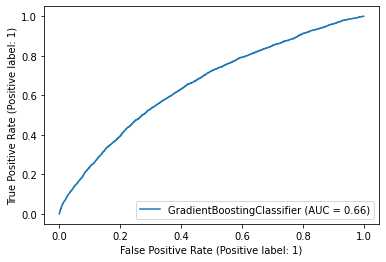

In [ ]:
RocCurveDisplay.from_estimator(gboost, validation_predictors, validation_target) 
plt.show()

The performance of a classifier is summarized by ROC AUC. The classifier performs better when the value is higher.
Our model's ROC AUC is 0.66 which leans in the direction of 1. We can therefore draw the conclusion that our classifier is effective at predicting whether patient will readmit or not.

## 7.9 XGBoost (using default parameters)

In [ ]:
xgboost_model = XGBClassifier(random_state=seed)


In [ ]:
_ = xgboost_model.fit(train_predictors, train_target)

In [ ]:
y_pred_xg = xgboost_model.predict(validation_predictors)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, y_pred_xg)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_xg)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_xg)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_xg)}")

      Model             Score       
************************************
>> Recall Score:  0.5991561181434599
Accuracy Score:   0.6297781157116196
Precision Score:  0.17484608619173264
F1 Score:         0.2706971677559913


Save the recall result from this model

In [ ]:
xgboost = recall_score(validation_target, y_pred_xg)

In [ ]:
accuracy_xg = accuracy_score(validation_target, y_pred_xg)
precision_xg = precision_score(validation_target, y_pred_xg)
recall_xg = recall_score(validation_target, y_pred_xg)

### 7.9.1 Classification metrics for different threshold levels (XGBoost)

In [ ]:
# Classification metrics for different threshold levels
xgboost_model = XGBClassifier(random_state=seed)

# fit the model
_ = xgboost_model.fit(train_predictors, train_target)

tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []
accur = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0,1.1, 0.1):  
    y_pred_xg_1 = xgboost_model.predict_proba(validation_predictors)[:,1]>=threshold
    cm = confusion_matrix(validation_target, y_pred_xg_1)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    accuracy =  (TP + TN)/ (TP + FN + TN + FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    accur.append(accuracy)
    thres.append(str(round(threshold,2)))

print(validation_target.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls,accur)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall','Accuracy'])
df



0    25616
1     3318
Name: readmitted, dtype: int64


,Threshold,TP,FP,TN,FN,FPR,TPR,Precision,Recall,Accuracy
0,0.0,3318,25616,0,0,1.000000,1.000000,0.114675,1.000000,0.114675
1,0.1,3318,25616,0,0,1.000000,1.000000,0.114675,1.000000,0.114675
2,0.2,3317,25584,32,1,0.998751,0.999699,0.114771,0.999699,0.115746
3,0.3,3263,24115,1501,55,0.941404,0.983424,0.119183,0.983424,0.164651
4,0.4,2692,16351,9265,626,0.638312,0.811332,0.141364,0.811332,0.413251
5,0.5,1966,9138,16478,1352,0.356730,0.592526,0.177053,0.592526,0.637451
6,0.6,995,3499,22117,2323,0.136594,0.299879,0.221406,0.299879,0.798783
7,0.7,331,769,24847,2987,0.030020,0.099759,0.300909,0.099759,0.870187
8,0.8,124,177,25439,3194,0.006910,0.037372,0.411960,0.037372,0.883493
9,0.9,8,10,25606,3310,0.000390,0.002411,0.444444,0.002411,0.885256


### 7.9.2 ROC Curve

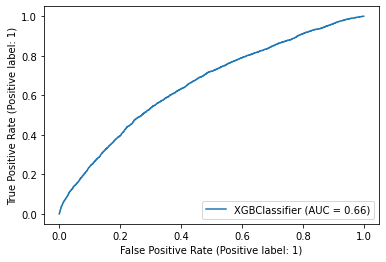

In [ ]:
RocCurveDisplay.from_estimator(xgboost_model, validation_predictors, validation_target) 
plt.show()

The performance of a classifier is summarized by ROC AUC. The classifier performs better when the value is higher. Our model's ROC AUC is 0.66 which leans in the direction of 1. We can therefore draw the conclusion that our classifier is effective at predicting whether patient will readmit or not.

## 7.9.3 XGBoost (using hyper parameters tuning)

In [ ]:
#Hyperparameter optimization using RandomizedSearchCV

xgboost_model1 = XGBClassifier(random_state=seed)
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}
best_random_search_model_xgb = RandomizedSearchCV(
        xgboost_model1, 
        scoring='recall', 
        param_distributions=params, 
        n_iter = 200, 
        cv=5, 
        verbose=0, 
        n_jobs = -1,  )

random_search=RandomizedSearchCV(xgboost_model1,param_distributions=params,n_iter=5,scoring='recall',cv=5,verbose=3)
best_random_search_xgb_v =best_random_search_model_xgb.fit(train_predictors, train_target)

print("Best  score is {}".format(best_random_search_xgb_v.best_score_))


y_pred_xgb_ht = best_random_search_xgb_v.predict(validation_predictors)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(validation_target, y_pred_xgb_ht)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_xgb_ht)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_xgb_ht)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_xgb_ht)}")
print("************************************")



Best  score is 0.9379895512779808
************************************
Recall Score:     0.2435201928872815
************************************
Accuracy Score:   0.7957765950093316
Precision Score:  0.19206085096268125
F1 Score:         0.21475083056478403
************************************


In [ ]:
accuracy_xg_ht = accuracy_score(validation_target, y_pred_xgb_ht)
precision_xg_ht = precision_score(validation_target, y_pred_xgb_ht)
recall_xg_ht = recall_score(validation_target, y_pred_xgb_ht)

## 7.10 KNN (using default parameters)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=317,  metric='euclidean')
#knn = KNeighborsClassifier(n_neighbors=71,  metric='manhattan')

knn.fit(train_predictors, train_target)
y_pred_knn = knn.predict(validation_predictors)


In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(validation_target, y_pred_knn)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred_knn)}")
print(f"{'Precision Score: ':18}{precision_score(validation_target, y_pred_knn)}")
print(f"{'F1 Score: ':18}{f1_score(validation_target, y_pred_knn)}")

      Model             Score       
************************************
>> Recall Score:  0.5186859553948161
Accuracy Score:   0.6223474113499688
Precision Score:  0.15573251289476064
F1 Score:         0.23954346161876258


## 7.11 k-NN (Hyperparamater Tuning)

In [ ]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(100,317,30)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

accuracy score:  0.6190600182038284
parameters:  {'metric': 'cosine', 'n_neighbors': 100}


In [ ]:
y_pred_knn_ht_ac=bestAccuracyKnn.predict(validation_predictors)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_pred_knn_ht_ac,validation_target))
#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred_knn_ht_ac,validation_target))

Accuracy: 0.6154696896384876
Confusion Matrix:
 [[16123  1633]
 [ 9493  1685]]


In [ ]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(100,317,20)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

precision score:  0.6217077546211253
parameters:  {'metric': 'cosine', 'n_neighbors': 100}


In [ ]:
y_pred_knn_ht_pc=bestPrecisionKnn.predict(validation_predictors)
#importing the metrics module
from sklearn import metrics
print("precision:",metrics.precision_score(y_pred_knn_ht_pc,validation_target))
#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred_knn_ht_pc,validation_target))

precision: 0.5078360458107294
Confusion Matrix:
 [[16123  1633]
 [ 9493  1685]]


In [ ]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(100,317,20)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallKnn = gridSearch.best_estimator_

recall score:  0.6082090561789851
parameters:  {'metric': 'cosine', 'n_neighbors': 100}


In [ ]:
y_pred_knn_ht_rc=bestRecallKnn.predict(validation_predictors)
#importing the metrics module
from sklearn import metrics
print("recall:",metrics.recall_score(y_pred_knn_ht_rc,validation_target))
#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred_knn_ht_rc,validation_target))

recall: 0.15074252996958312
Confusion Matrix:
 [[16123  1633]
 [ 9493  1685]]


In [ ]:
accuracy_knn_ht = accuracy_score(validation_target, y_pred_knn_ht_ac)
precision_knn_ht = precision_score(validation_target, y_pred_knn_ht_pc)
recall_knn_ht = recall_score(validation_target, y_pred_knn_ht_rc)

## Sep 8: Model Comparision

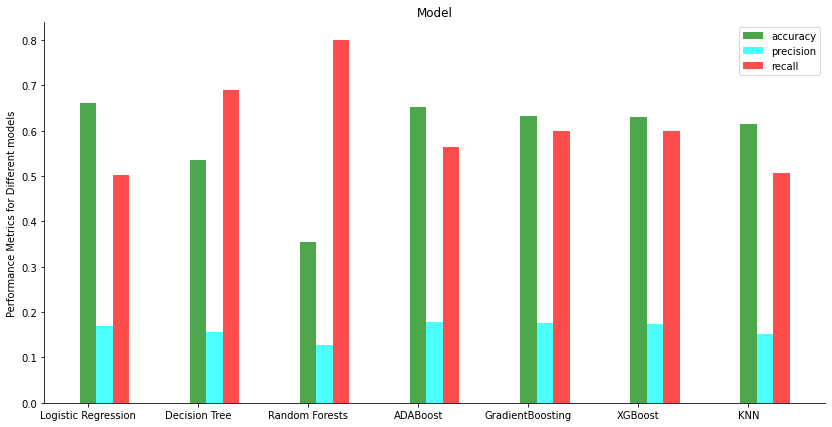

In [ ]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

# models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'ADABoost' , 'GradientBoosting', 'XGBoost','KNN']
# ADABoost , GradientBoosting, XGBoost, KNN
values = [accuracy_logreg, accuracy_dt_gs, accuracy_rf_ht,accuracy_ada,accuracy_gboost,accuracy_xg,accuracy_knn_ht]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'green', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'ADABoost' , 'GradientBoosting', 'XGBoost','KNN']
values = [precision_logreg, precision_dt_gs, precision_rf_ht,precision_ada,precision_gboost,precision_xg,precision_knn_ht]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'cyan', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'ADABoost' , 'GradientBoosting', 'XGBoost','KNN' ]

values = [recall_logreg, recall_dt_gs, recall_rf_ht,recall_ada,recall_gboost,recall_xg,recall_knn_ht]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'red', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

### Step 9: Discussion of Results and Conclusion



Our goal is to develop few models that can predict whether a patient readmits to hospital with in 30 days or not. We tried evaluating  logistic regression, Decision tree, random forest, ADABoost, GradientBoosting, XGBoost and KNN with tarin and test data and then performed hyderparameter tuning to explore the best parameters.We then created both ROC AUC Curve and below are our findings.

Out of all the models that we tried, the models which resulted in recall greater than 0.6 are Decision Tree, Random Forest,GradientBoost and XGBoost . Among these, we identified that GradientBoost and XGBoost yeilded almost the same results with minute differences. So keeping a threshold of 0.6 for both Recall and Accuracy scores only GradientBoost and XGBoost models predicted the readmission with scores above 0.6. 

Also on the other hand, there are some interesting results with RandomForest yeilded Recall value of 0.8 but its accuracy dropped to 0.35. For decison tree Recall valie is 0.7 and accuracy is 0.54.

- After trying model on different threshold values we could see that at threshold level 0.6 GradientBoost and XGBoost models models are performing better.

- We also plotted ROC AUC for both GradientBoost and XGBoostmodels models which results in 0.66. As its greater than 0.5 and leans towards 1, we may  draw the conclusion that our classifier does a decent job predicting patients readmission.

Using GradientBoost and XGBoostmodels hospitals can reduce readmissions by 60% which is definitely a decent job. Early prediction can also help to lessen the severity of the situation and lessen the penalities on hospitals.

